# Importing the Dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("mammographic_masses.data.txt")

In [4]:
df.head()

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


# Naming the Columns

In [5]:
df=pd.read_csv("mammographic_masses.data.txt",na_values='?',names=['BI_RAIDS','AGE','SHAPE','MARGIN','DENSITY','SEVERITY'],usecols=range(0,6))
df.head(5)

,BI_RAIDS,AGE,SHAPE,MARGIN,DENSITY,SEVERITY
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [6]:
df.describe()

,BI_RAIDS,AGE,SHAPE,MARGIN,DENSITY,SEVERITY
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


# Checking for Null Values

In [7]:
print("The number of Null values per feature:")
df.isnull().sum()

The number of Null values per feature:


BI_RAIDS     2
AGE          5
SHAPE       31
MARGIN      48
DENSITY     76
SEVERITY     0
dtype: int64

In [8]:
df.shape

(961, 6)

# Viewing the Rows with Null Values

In [9]:
df.loc[(df['AGE'].isnull())| 
       (df['SHAPE'].isnull())| 
       (df['MARGIN'].isnull())|
       (df['DENSITY'].isnull())]

,BI_RAIDS,AGE,SHAPE,MARGIN,DENSITY,SEVERITY
1,4.0,43.0,1.0,1.0,NaN,1
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
...,...,...,...,...,...,...
778,4.0,60.0,NaN,4.0,3.0,0
819,4.0,35.0,3.0,NaN,2.0,0
824,6.0,40.0,NaN,3.0,4.0,1
884,5.0,NaN,4.0,4.0,3.0,1


# Filling in the Missing Values

In [10]:
df1=df
df1['BI_RAIDS']=df1['BI_RAIDS'].fillna(method="ffill")
print(df1['BI_RAIDS'].isnull().sum())
df1
df1.to_csv("mammogram.csv", index = False)

0


In [11]:
df1=df
df1['AGE']=df1['AGE'].fillna(method="ffill")
print(df1['AGE'].isnull().sum())
df1
df1.to_csv("mammogram.csv", index = False)

0


In [12]:
df1=df
df1['SHAPE']=df1['SHAPE'].fillna(method="ffill")
print(df1['SHAPE'].isnull().sum())
df1
df1.to_csv("mammogram.csv", index = False)

0


In [13]:
df1=df
df1['MARGIN']=df1['MARGIN'].fillna(method="ffill")
print(df1['MARGIN'].isnull().sum())
df1
df1.to_csv("mammogram.csv", index = False)

0


In [14]:
df1=df
df1['DENSITY']=df1['DENSITY'].fillna(method="ffill")
print(df1['DENSITY'].isnull().sum())
df1
df1.to_csv("mammogram.csv", index = False)

0


In [15]:
df=pd.read_csv("mammogram.csv")
df

,BI_RAIDS,AGE,SHAPE,MARGIN,DENSITY,SEVERITY
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,3.0,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,3.0,1
...,...,...,...,...,...,...
956,4.0,47.0,2.0,1.0,3.0,0
957,4.0,56.0,4.0,5.0,3.0,1
958,4.0,64.0,4.0,5.0,3.0,0
959,5.0,66.0,4.0,5.0,3.0,1


In [51]:
df.SHAPE = df.SHAPE.astype(int)
df.MARGIN = df.MARGIN.astype(int)

# Feature Distribution

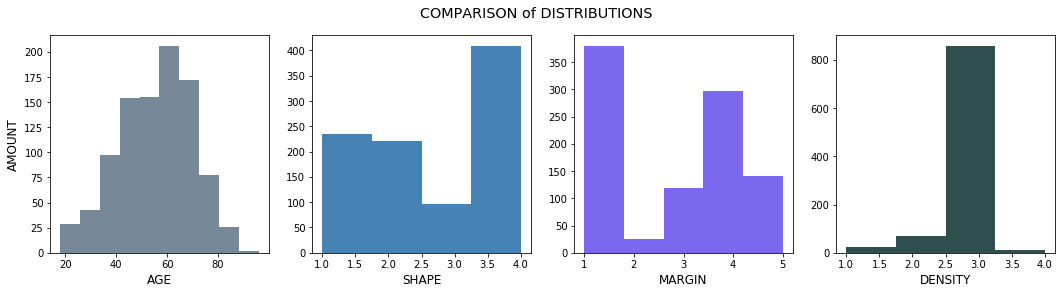

In [16]:
fig, axes = plt.subplots(1,4, sharey=False, figsize=(18,4))
ax1, ax2, ax3, ax4 = axes.flatten()

ax1.hist(df['AGE'], bins=10, color="lightslategray")
ax2.hist(df['SHAPE'], bins=4, color="steelblue")
ax3.hist(df['MARGIN'], bins=5, color="mediumslateblue")
ax4.hist(df['DENSITY'], bins=4, color="darkslategray")
ax1.set_xlabel('AGE', fontsize="large")
ax2.set_xlabel('SHAPE', fontsize="large")
ax3.set_xlabel('MARGIN', fontsize="large")
ax4.set_xlabel('DENSITY', fontsize="large")
ax1.set_ylabel("AMOUNT", fontsize="large")

plt.suptitle('COMPARISON of DISTRIBUTIONS', ha='center', fontsize='x-large')
plt.show()

# In the Severity column : 0 represents Benign and 1 represents Malignant 

In [17]:
df['SEVERITY'].value_counts()

0    516
1    445
Name: SEVERITY, dtype: int64

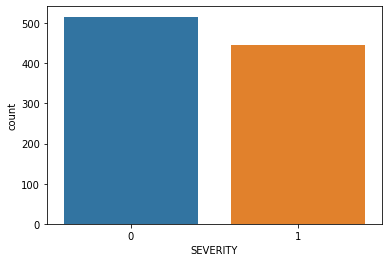

In [18]:
#visualizing the count
sns.countplot(df['SEVERITY'],label='count')

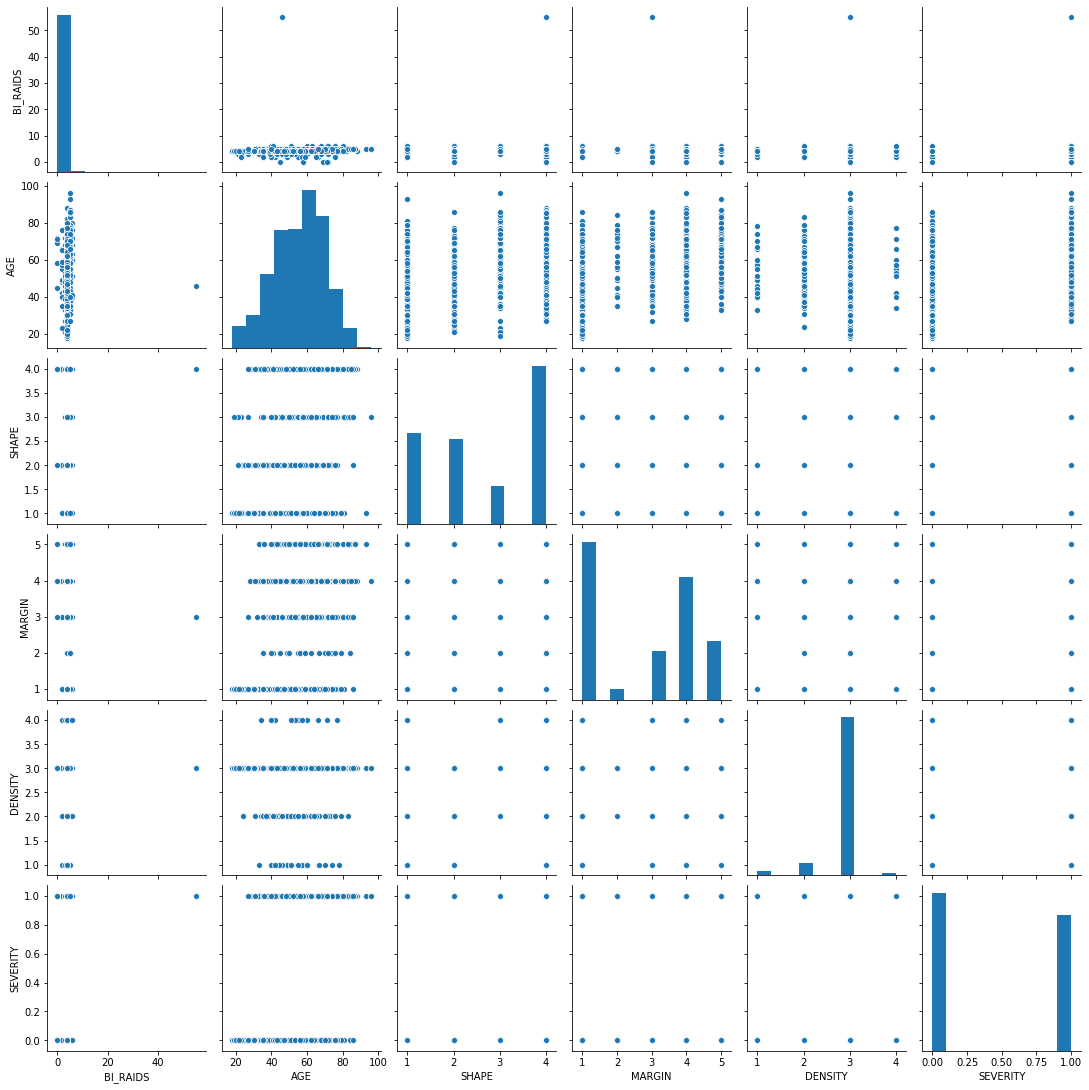

In [19]:
sns.pairplot(df.iloc[:,:6])

# Finding Correlation among the Columns

In [20]:
df.iloc[:,0:6].corr()

,BI_RAIDS,AGE,SHAPE,MARGIN,DENSITY,SEVERITY
BI_RAIDS,1.000000,0.093045,0.181695,0.155236,0.033262,0.231318
AGE,0.093045,1.000000,0.349786,0.380203,0.038732,0.422858
SHAPE,0.181695,0.349786,1.000000,0.687542,0.089572,0.552178
MARGIN,0.155236,0.380203,0.687542,1.000000,0.081993,0.547629
DENSITY,0.033262,0.038732,0.089572,0.081993,1.000000,0.065638
SEVERITY,0.231318,0.422858,0.552178,0.547629,0.065638,1.000000


# Visualizing the Correlation using Heat-Map

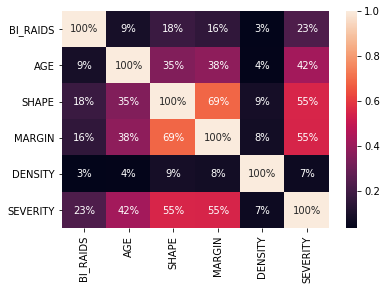

In [21]:
sns.heatmap(df.iloc[:,0:6].corr(), annot=True , fmt='.0%')

# Converting the Dataframe into an Array of Values

In [22]:
all_f=df[['AGE','SHAPE','MARGIN','DENSITY']].values
classes=df['SEVERITY'].values
f_name=['AGE','SHAPE','MARGIN','DENSITY']
all_f

array([[67.,  3.,  5.,  3.],
       [43.,  1.,  1.,  3.],
       [58.,  4.,  5.,  3.],
       ...,
       [64.,  4.,  5.,  3.],
       [66.,  4.,  5.,  3.],
       [62.,  3.,  3.,  3.]])

# Normalization

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features_scaled=scaler.fit_transform(all_f)
print("Scaled features:")
features_scaled

Scaled features:


array([[ 0.79957055,  0.23507871,  1.41407269,  0.25888246],
       [-0.85569336, -1.37282622, -1.13789699,  0.25888246],
       [ 0.17884659,  1.03903118,  1.41407269,  0.25888246],
       ...,
       [ 0.59266256,  1.03903118,  1.41407269,  0.25888246],
       [ 0.73060122,  1.03903118,  1.41407269,  0.25888246],
       [ 0.4547239 ,  0.23507871,  0.13808785,  0.25888246]])

# DECISION TREE

#Divide the dataset as 75% for training and 25% for testing.

In [24]:
import numpy  
from sklearn.model_selection import train_test_split
numpy.random.seed(1234)
(trainig_inputs,testing_inputs, trainig_classes, testing_classes)=train_test_split(features_scaled, classes, train_size=0.75,random_state=1)

In [25]:
list_of_accuracies = {}

In [26]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1)
clf.fit(trainig_inputs, trainig_classes)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [27]:
clf.score(testing_inputs, testing_classes)

0.7136929460580913

#Now instead of a single train/test split, use can use K-fold cross validation to get better measure of our model's 
#accuracy(k=10). So, we use model_selection.cross_val_score.

In [28]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=1)
cv_scores=cross_val_score(clf,features_scaled,classes,cv=10)
cv_scores.mean()

0.7409149484536083

In [29]:
list_of_accuracies['decisiontree'] = cv_scores.mean()

# RandomForest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10,random_state=1)
cv_scores=cross_val_score(clf,features_scaled,classes,cv=10)
cv_scores.mean()

0.7596542096219931

In [31]:
list_of_accuracies['randomforest'] = cv_scores.mean()

# KNN

In [32]:
from sklearn import neighbors
clf=neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores=cross_val_score(clf,features_scaled,classes,cv=10)
cv_scores.mean()

0.7700386597938145

In [33]:
list_of_accuracies['knn'] = cv_scores.mean()

In [34]:
for n in range(1,50):
    clf=neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores=cross_val_score(clf,features_scaled,classes,cv=10)
    print(n,cv_scores.mean())

1 0.7013745704467355
2 0.6857280927835052
3 0.7461340206185567
4 0.737768470790378
5 0.7648303264604811
6 0.7606851374570447
7 0.7867053264604811
8 0.774205326460481
9 0.7835695876288659
10 0.7700386597938145
11 0.7783612542955327
12 0.7783397766323025
13 0.7887564432989691
14 0.7793921821305843
15 0.7877255154639174
16 0.7783290378006873
17 0.7845897766323023
18 0.780433848797251
19 0.786683848797251
20 0.7856421821305842
21 0.783569587628866
22 0.786683848797251
23 0.786694587628866
24 0.783569587628866
25 0.7825279209621993
26 0.7794243986254296
27 0.7887886597938145
28 0.789830326460481
29 0.7877362542955326
30 0.7867053264604811
31 0.7856636597938145
32 0.7867160652920961
33 0.7919136597938145
34 0.7867160652920961
35 0.7919243986254296
36 0.7867375429553265
37 0.7898518041237115
38 0.7898625429553265
39 0.7909042096219931
40 0.7877899484536082
41 0.7867482817869416
42 0.7857066151202748
43 0.7857066151202747
44 0.7867375429553263
45 0.7898625429553264
46 0.7940184707903779
47 0.7

# Naive Bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
all_features_minmax=scaler.fit_transform(all_f)
clf=MultinomialNB()
cv_scores=cross_val_score(clf,all_features_minmax,classes,cv=10)
cv_scores.mean()

0.7471971649484537

In [36]:
list_of_accuracies['mnb'] = cv_scores.mean()

In [37]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(trainig_inputs, trainig_classes)
cv_scores=cross_val_score(clf,all_features_minmax,classes,cv=10)
cv_scores.mean()

0.7471971649484537

In [38]:
classifier.score(testing_inputs, testing_classes)

0.7717842323651453

In [39]:
list_of_accuracies['gnb'] = cv_scores.mean()

# SVM

In [40]:
from sklearn import svm
C=1.0
svc = svm.SVC(kernel='linear',C=C)
svc.fit(trainig_inputs, trainig_classes)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
cv_scores=cross_val_score(svc,features_scaled,classes,cv=10)
cv_scores.mean()

0.7919243986254295

In [42]:
list_of_accuracies['svm'] = cv_scores.mean()

In [43]:
c=1.0
svc=svm.SVC(kernel='rbf',C=C)
cv_scores=cross_val_score(svc,features_scaled,classes,cv=10)
cv_scores.mean()

0.7939862542955327

<BarContainer object of 10 artists>

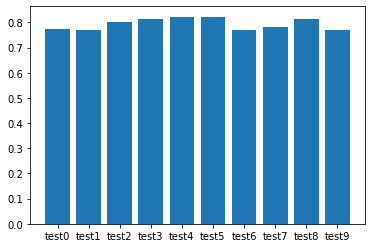

In [44]:
plt.bar(['test' + str(i) for i in range(len(cv_scores))], cv_scores)

In [45]:
c=1.0
svc=svm.SVC(kernel='sigmoid',C=C)
cv_scores=cross_val_score(svc,features_scaled,classes,cv=10)
cv_scores.mean()

0.7253758591065292

In [46]:
c=1.0
svc=svm.SVC(kernel='poly',C=C)
cv_scores=cross_val_score(svc,features_scaled,classes,cv=10)
cv_scores.mean()

0.7794458762886597

<BarContainer object of 10 artists>

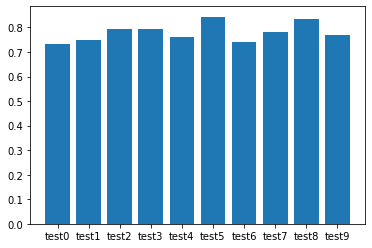

In [47]:
plt.bar(['test' + str(i) for i in range(len(cv_scores))], cv_scores)

In [48]:
list_of_accuracies['svm'] = cv_scores.mean()

In [49]:
list_of_accuracies

{'decisiontree': 0.7409149484536083,
 'randomforest': 0.7596542096219931,
 'knn': 0.7700386597938145,
 'mnb': 0.7471971649484537,
 'gnb': 0.7471971649484537,
 'svm': 0.7794458762886597}

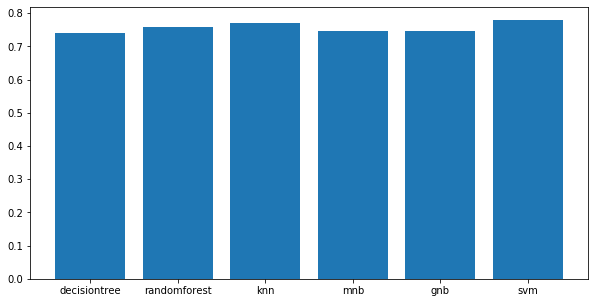

In [50]:
plt.figure(figsize=(10, 5))
plt.bar(list_of_accuracies.keys(), list_of_accuracies.values())
plt.savefig('final_plot.png')